In [45]:
import numpy as np
from numpy import sqrt,pi
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=6, sort_dicts=False)

In [46]:
### Übersetzuungsfaktor 2.8 wurde aus Beispielrechnung von Edutecnica übernommen
ü=2.8
Motors=[]

MotorA={
    "Name":"Motor A",
    "I_N":29,
    "cosPhiK":0.48,
    "P_cu":1900,
    "R_s":0.2,
    "U_N":400,
    "f":50,
    "p":2,
    "ü":ü,
}

MotorB={
    "Name":"Motor B",
    "I_N":31.5,
    "cosPhiK":0.51,
    "P_cu":2400,
    "R_s":0.14,
    "U_N":400,
    "f":50,
    "p":2,
    "ü":ü,
}

MotorC={
    "Name":"Motor C",
    "I_N":31,
    "cosPhiK":0.49,
    "P_cu":2000,
    "R_s":0.23,
    "U_N":400,
    "f":50,
    "p":2,
    "ü":ü,
}

MotorTest={  ## aus http://www.edutecnica.it/elettrotecnica/matx/5.htm
    "Name":"Motor Test Edutecnica",
    "I_N":24,
    "cosPhiK":0.2215,
    "P_cu":350,
    "R_s":0.12,
    "U_N":380,
    "f":50,
    "p":2,
    "ü":ü,
}

MotorBenni={ 
    "Name":"Motor Benni",
    "I_N":22,
    "cosPhiK":0.32,
    "P_cu":800,
    "R_s":0.3,
    "U_N":400,
    "f":50,
    "p":2,
    "ü":ü,
}

Motors.append(MotorA)
Motors.append(MotorB)
Motors.append(MotorC)
Motors.append(MotorBenni)
Motors.append(MotorTest)


In [47]:
def calculateMotorStats(Motor):
    #Load Dict
    I_N=Motor["I_N"]
    cosPhiK=Motor["cosPhiK"]
    P_cu=Motor["P_cu"]
    R_s=Motor["R_s"]
    ü=Motor["ü"]
    p=Motor["p"]

    #Leistung pro Strang
    P_cuStrang=P_cu/3

    #KurzschlussSpannung
    U_K=P_cu/(sqrt(3)*I_N*cosPhiK)


    #Widerstände Gesamt
    Z_eq=P_cuStrang/(cosPhiK*I_N**2)  
    R_eq=P_cuStrang/(I_N**2)
    X_eq=sqrt(Z_eq**2-R_eq**2)


    #Statorwiderstände
    R1= R_s
    X1= X_eq/2

    #Rotorwiderstände
    R2Strich= (R_eq-R_s)/ü**2
    X2Strich= (X1)/ü**2


    #Write back to Dict
    Motor["U_K"]=U_K
    Motor["Z_eq"]=Z_eq
    Motor["R_eq"]=R_eq
    Motor["X_eq"]=X_eq
    
    Motor["R1"]=R1
    Motor["R2Strich"]=R2Strich
    Motor["X1"]=X1
    Motor["X2Strich"]=X2Strich


In [48]:
for Motor in Motors:
    calculateMotorStats(Motor)

In [49]:
for Motor in Motors:
    pp.pprint(Motor)
    print()

{     'Name': 'Motor A',
      'I_N': 29,
      'cosPhiK': 0.48,
      'P_cu': 1900,
      'R_s': 0.2,
      'U_N': 400,
      'f': 50,
      'p': 2,
      'ü': 2.8,
      'U_K': 78.80499363938858,
      'Z_eq': 1.5688994583168188,
      'R_eq': 0.753071739992073,
      'X_eq': 1.3763460555878084,
      'R1': 0.2,
      'R2Strich': 0.07054486479490729,
      'X1': 0.6881730277939042,
      'X2Strich': 0.0877771719124878}

{     'Name': 'Motor B',
      'I_N': 31.5,
      'cosPhiK': 0.51,
      'P_cu': 2400,
      'R_s': 0.14,
      'U_N': 400,
      'f': 50,
      'p': 2,
      'ü': 2.8,
      'U_K': 86.25214105540628,
      'Z_eq': 1.5808792652863615,
      'R_eq': 0.8062484252960443,
      'X_eq': 1.3598318749463092,
      'R1': 0.14,
      'R2Strich': 0.0849806664918424,
      'X1': 0.6799159374731546,
      'X2Strich': 0.08672397161647381}

{     'Name': 'Motor C',
      'I_N': 31,
      'cosPhiK': 0.49,
      'P_cu': 2000,
      'R_s': 0.23,
      'U_N': 400,
      'f': 50,
      

In [50]:
def calculateTorque(Motor,s):
        U_N=Motor["U_N"]
        p=Motor["p"]
        f=Motor["f"]

        R1=Motor["R1"]
        X1=Motor["X1"]

        R2Strich=Motor["R2Strich"]
        X2Strich=Motor["X2Strich"]

        return p*R2Strich*(U_N/sqrt(3))**2/(2*pi*f*s*((R1+R2Strich/s)**2)+(X1+X2Strich)**2)

In [51]:
def calculateCurrent(Motor,s):
        U_N=Motor["U_N"]

        R1=Motor["R1"]
        X1=Motor["X1"]

        R2Strich=Motor["R2Strich"]
        X2Strich=Motor["X2Strich"]

        return U_N/sqrt(3)/(sqrt((R1+R2Strich/s)**2+(X1+X2Strich)**2))

In [52]:
x=np.arange(0,1,0.0001)
yS=[]

labels=[]

for Motor in Motors:
    yS.append(calculateTorque(Motor,x))
    labels.append(Motor["Name"])

<ipython-input-50-7e7aa8746916>:12: RuntimeWarning: divide by zero encountered in true_divide
  return p*R2Strich*(U_N/sqrt(3))**2/(2*pi*f*s*((R1+R2Strich/s)**2)+(X1+X2Strich)**2)
<ipython-input-50-7e7aa8746916>:12: RuntimeWarning: invalid value encountered in multiply
  return p*R2Strich*(U_N/sqrt(3))**2/(2*pi*f*s*((R1+R2Strich/s)**2)+(X1+X2Strich)**2)


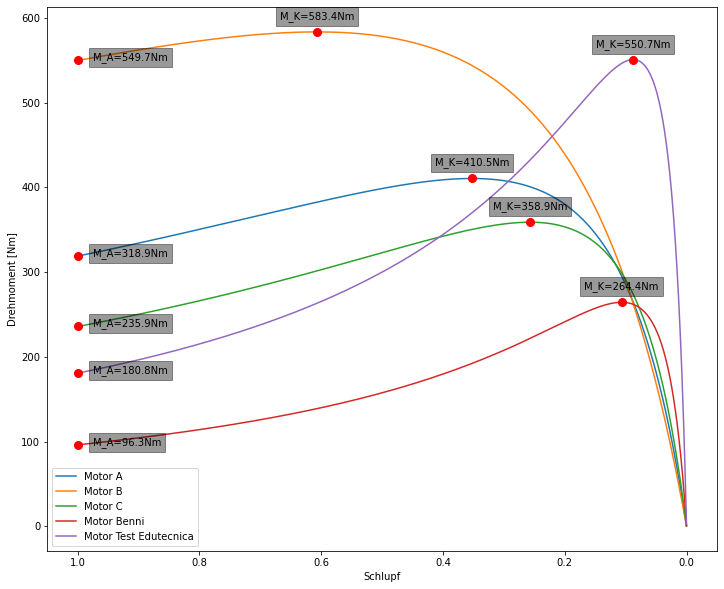

In [53]:
fig = plt.figure(figsize=(12, 10))
ax=fig.subplots(1,1)


for y,l in zip(yS,labels):  
    #Plot line
    ax.plot(x,y,label=l)

    #Special Points
    s_kipp=x[np.nanargmax(y)]
    M_kipp=y[np.nanargmax(y)]

    s_anlauf=x[-1]
    M_anlauf=y[-1]

    #AnlaufMoment
    ax.plot(s_anlauf,M_anlauf,ls="",color="r",marker="o",markersize=8,label=None)
    ax.annotate(f"M_A={(np.round(M_anlauf,decimals=1))}Nm",(s_anlauf,M_anlauf),
                textcoords="offset points", xytext=(15,0), ha='left',bbox=dict(boxstyle="square,pad=0.4",fc="k",alpha=0.4,ec="k"))
    
    #KippMoment
    ax.plot(s_kipp,M_kipp,ls="",color="r",marker="o",markersize=8,label=None)
    ax.annotate(f"M_K={(np.round(M_kipp,decimals=1))}Nm",(s_kipp,M_kipp),
                textcoords="offset points", xytext=(0,10), ha="center",va='bottom',bbox=dict(boxstyle="square,pad=0.4",fc="k",alpha=0.4,ec="k"))



ax.invert_xaxis()
ax.set_xlabel('Schlupf')
ax.set_ylabel('Drehmoment [Nm]')
ax.legend()

In [54]:
x=np.arange(0,1,0.0001)
yS=[]

labels=[]

for Motor in Motors:
    yS.append(calculateCurrent(Motor,x))
    labels.append(Motor["Name"])

<ipython-input-51-d0224640df0b>:10: RuntimeWarning: divide by zero encountered in true_divide
  return U_N/sqrt(3)/(sqrt((R1+R2Strich/s)**2+(X1+X2Strich)**2))


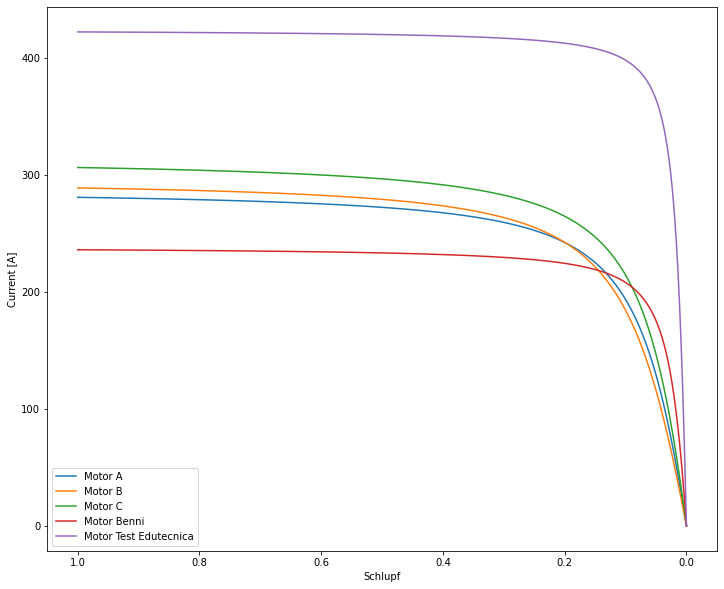

In [55]:
fig = plt.figure(figsize=(12, 10))
ax=fig.subplots(1,1)


for y,l in zip(yS,labels):  
    #Plot line
    ax.plot(x,y,label=l)

ax.invert_xaxis()
ax.set_xlabel('Schlupf')
ax.set_ylabel('Current [A]')
ax.legend()